In [4]:
import sys
sys.path.append("../../src")

import yaml
from omegaconf import OmegaConf
from matplotlib import pyplot as plt
from utils import num_params

# Load the configuration
file_path = "config.yaml"
with open(file_path, 'r') as file:
    config = OmegaConf.create(yaml.safe_load(file))

import torch
import numpy as np
torch.manual_seed(config.seed)
np.random.seed(config.seed)

In [5]:
from models import CCNN

in_channels = 1
out_channels = 10
hidden_channels = 20
omega_0 = 30.0

model = CCNN(
    in_channels, 
    out_channels,
    config
)

model.to('cpu')

CCNN(
  (backbone): Sequential(
    (0): CKBlock(
      (conv1): CKConv(
        (Kernel): KernelNet(
          (kernel_net): Sequential(
            (0): ParametrizedConv1d(
              1, 32, kernel_size=(1,), stride=(1,)
              (parametrizations): ModuleDict(
                (weight): ParametrizationList(
                  (0): _WeightNorm()
                )
              )
            )
            (1): Expression()
            (2): Expression()
            (3): ParametrizedConv1d(
              32, 32, kernel_size=(1,), stride=(1,)
              (parametrizations): ModuleDict(
                (weight): ParametrizationList(
                  (0): _WeightNorm()
                )
              )
            )
            (4): Expression()
            (5): Expression()
            (6): ParametrizedConv1d(
              32, 20, kernel_size=(1,), stride=(1,)
              (parametrizations): ModuleDict(
                (weight): ParametrizationList(
                  (0): _Wei

The size of the Input is: torch.Size([10, 1, 1000])
The size of the Output is: torch.Size([10, 20])
The size of the Convolutional Kernel is: torch.Size([20, 1, 1000])
The number of parameters of the conv. layer is: 1884
The size of the Convolutional Kernel is: torch.Size([20, 20, 1000])
The number of parameters of the conv. layer is: 14804
The size of the Convolutional Kernel is: torch.Size([20, 20, 1000])
The number of parameters of the conv. layer is: 14804
The size of the Convolutional Kernel is: torch.Size([20, 20, 1000])
The number of parameters of the conv. layer is: 14804


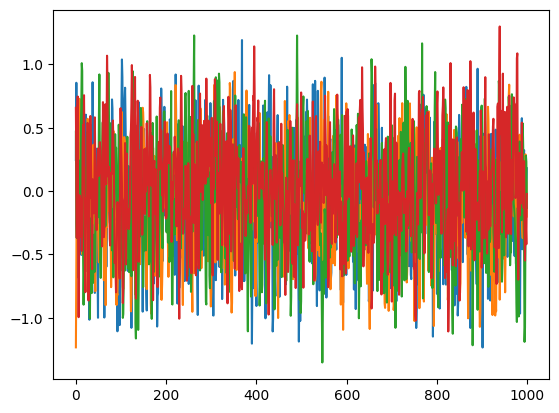

In [6]:
# Input:
from ckconv.ckconv import CKConv


batch_size = 10
length = 1000
input_channels = 1

input = torch.rand([batch_size, input_channels, length])
print(f'The size of the Input is: {input.shape}')

output = model(input) #inference with just one layer

print(f'The size of the Output is: {output.shape}')

for module in model.modules():
    if isinstance(module, CKConv):
        print(f'The size of the Convolutional Kernel is: {module.conv_kernel.shape}')
        print(f'The number of parameters of the conv. layer is: {num_params(module)}')
        plt.plot(module.conv_kernel.view(-1, length)[0].detach().numpy())
plt.show()